In [1]:
import keras
from keras import models
from keras import layers
from keras import optimizers
from keras import metrics
import matplotlib.pyplot as plt

In [2]:
train_path = '../chest_xray/train'
test_path = '../chest_xray/test'
val_path = '../chest_xray/val'

train_generator = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=45,
    zoom_range=0.3
)

train_ds = train_generator.flow_from_directory(
    train_path,
    target_size=(256,256),
    class_mode='binary',
)

Found 4175 images belonging to 2 classes.


In [3]:
val_generator = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

val_ds = val_generator.flow_from_directory(
    val_path,
    target_size=(256,256),
    class_mode='binary',
)

Found 1057 images belonging to 2 classes.


In [4]:
test_generator = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

test_ds = test_generator.flow_from_directory(
    test_path,
    target_size=(256,256),
    class_mode='binary'
)

Found 624 images belonging to 2 classes.


In [5]:
model = models.Sequential()

model.add(layers.Conv2D(32, (1, 1), activation='tanh',padding='same',
                        input_shape=(256, 256, 3)))                     
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (1, 1), activation='tanh',padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (1, 1), activation='tanh',padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='tanh'))
model.add(layers.Dense(128, activation='tanh'))
model.add(layers.Dense(64, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

In [6]:
checkpoint = keras.callbacks.ModelCheckpoint(
    monitor='val_loss',
    filepath='save_data/04_tanh_activation.hdf5',
    save_best_only=True,
    verbose=0
)

callbacks = [checkpoint]

In [7]:
use_metrics = [metrics.BinaryAccuracy(),\
                metrics.Precision(),\
                metrics.Recall()]

model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.Adam(),
    metrics=[use_metrics]
)

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      2112      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 128)       8320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 131072)            0

In [8]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    callbacks=callbacks
)

model = keras.models.load_model('save_data/04_tanh_activation.hdf5')

Epoch 1/20
131/131 [==============================] - 86s 659ms/step - loss: 0.5912 - binary_accuracy: 0.7416 - precision: 0.7434 - recall: 0.9955 - val_loss: 0.5742 - val_binary_accuracy: 0.7408 - val_precision: 0.7408 - val_recall: 1.0000
Epoch 2/20
131/131 [==============================] - 86s 656ms/step - loss: 0.5731 - binary_accuracy: 0.7425 - precision: 0.7425 - recall: 1.0000 - val_loss: 0.5725 - val_binary_accuracy: 0.7408 - val_precision: 0.7408 - val_recall: 1.0000
Epoch 3/20
131/131 [==============================] - 86s 653ms/step - loss: 0.5722 - binary_accuracy: 0.7425 - precision: 0.7425 - recall: 1.0000 - val_loss: 0.5723 - val_binary_accuracy: 0.7408 - val_precision: 0.7408 - val_recall: 1.0000
Epoch 4/20
131/131 [==============================] - 85s 647ms/step - loss: 0.5706 - binary_accuracy: 0.7425 - precision: 0.7425 - recall: 1.0000 - val_loss: 0.5739 - val_binary_accuracy: 0.7408 - val_precision: 0.7408 - val_recall: 1.0000
Epoch 5/20
131/131 [================

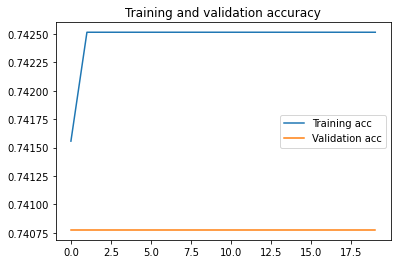

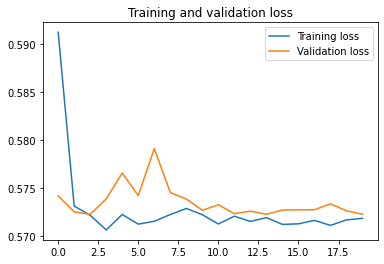

In [9]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

In [10]:
train_res = model.evaluate(train_ds)

131/131 [==============================] - 52s 398ms/step - loss: 0.5704 - binary_accuracy: 0.7425 - precision: 0.7425 - recall: 1.0000


In [11]:
val_res = model.evaluate(val_ds)

34/34 [==============================] - 7s 214ms/step - loss: 0.5723 - binary_accuracy: 0.7408 - precision: 0.7408 - recall: 1.0000


In [12]:
test_res = model.evaluate(test_ds)

20/20 [==============================] - 4s 185ms/step - loss: 0.6928 - binary_accuracy: 0.6250 - precision: 0.6250 - recall: 1.0000
